<h2>Descrição do Estudo</h2>

<p>
Este estudo tem como objetivo explorar e entender melhor os dados do conjunto Titanic,
analisando quem sobreviveu e quem não sobreviveu ao desastre. A partir da análise, são feitas
comparações entre idade, sexo, classe social e outras características dos passageiros, usando
gráficos e tabelas para visualizar padrões e relações nos dados.
</p>

<p>
O foco do trabalho é praticar análise de dados com Python, utilizando bibliotecas como
Pandas, Matplotlib e Seaborn para gerar insights de forma simples e didática.
</p>


## Dataset Titanic

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

In [30]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Valores Nulos

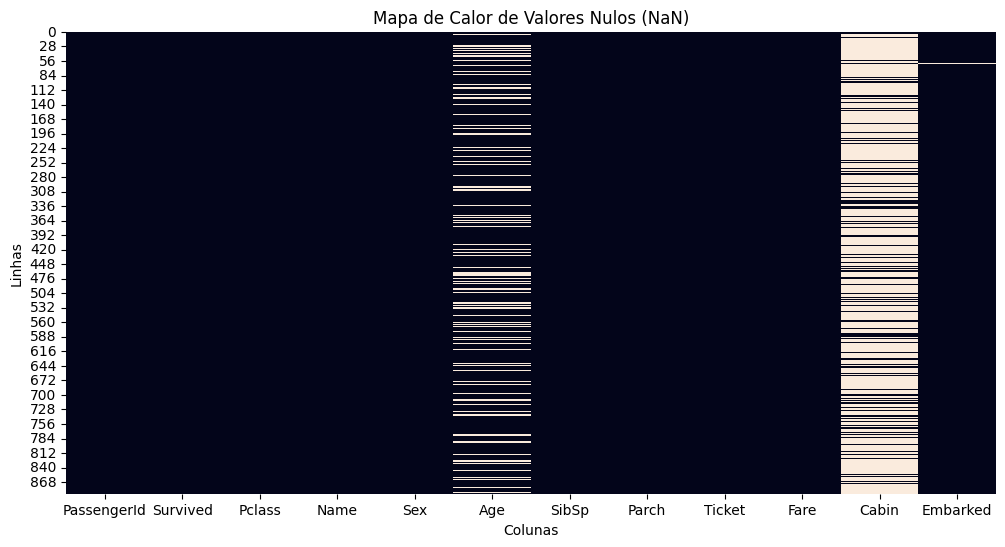

In [32]:
plt.figure(figsize=(12, 6))

# Cria um mapa: True = NaN, False = não-NaN
sns.heatmap(df.isnull(), cbar=False,)

plt.title("Mapa de Calor de Valores Nulos (NaN)")
plt.xlabel("Colunas")
plt.ylabel("Linhas")
plt.show()


In [33]:
# Preencher valores nulos da coluna Age com a média
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Remover a coluna Cabin
df = df.drop(columns=["Cabin"])

In [34]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df = df.dropna(subset=["Embarked"])

## Contagem de Sobreviventes

In [36]:
# Cria um DataFrame com a coluna 'Survived' e uma coluna auxiliar 'amount' com valor 1 em todas as linhas.
survived_df = pd.concat(
    [df['Survived'], pd.DataFrame({'amount': len(df) * [1]})],
    axis=1)

# Agrupa os dados pela coluna 'Survived' (0 = não sobreviveu, 1 = sobreviveu)
# e soma a coluna 'amount' para obter o total de pessoas em cada grupo.
grouped_survived_df = survived_df.groupby('Survived').agg('sum')
grouped_survived_df


,amount
Survived,
0.0,548.0
1.0,339.0


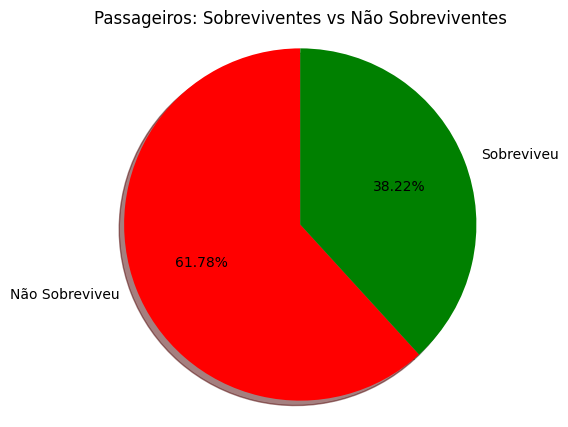

In [37]:
plt.figure(figsize=(5, 5))
plt.pie(grouped_survived_df["amount"], labels=["Não Sobreviveu", "Sobreviveu"], colors=["red", "green"], autopct="%0.2f%%",
        shadow=True, startangle=90)

plt.title("Passageiros: Sobreviventes vs Não Sobreviventes")
plt.axis("equal")
plt.show()


## Descobrir quantas passageiras viajaram na primeira classe.

In [38]:
df.Sex.value_counts()

,count
Sex,
male,577
female,312


In [39]:
df_female = df[df.Sex == "female"]

In [40]:
var1 = df_female.Pclass.value_counts()
var1

,count
Pclass,
3,144
1,92
2,76


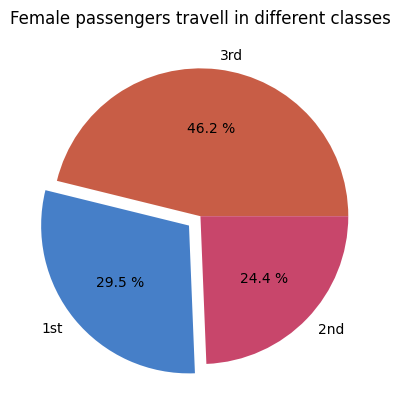

In [41]:
plt.pie(var1, colors = ["#c85d46", "#467fc8", "#c8466b"], labels = ["3rd", "1st", "2nd"], autopct = "%0.01f %%",
       explode=(0, 0.1, 0))
plt.title("Female passengers travell in different classes")
plt.show()

## Descobrir quantas passageiras sobreviveram e tinham idade menor que 30 anos.

In [42]:
df_female[df_female.Age<30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,S
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.000000,0,0,2667,7.2250,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.000000,0,1,230433,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S


In [43]:
df_f_a = df[(df.Age<30) & (df.Sex=="female")]
var2 = df_f_a.Survived.value_counts()
var2

,count
Survived,
1,141
0,59


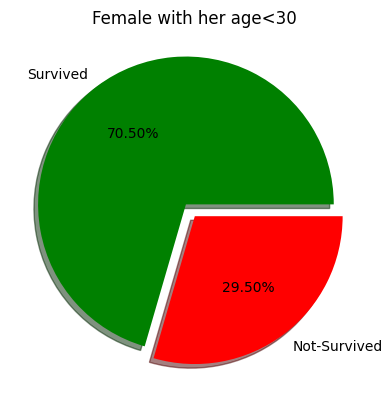

In [44]:
plt.pie(var2, shadow=True, autopct="%0.2f%%", labels = ["Survived", "Not-Survived"], colors = ["g", 'r'], explode = (0.1, 0))
plt.title("Female with her age<30")
plt.show()

## Mostrar a frequência de idades entre sobreviventes e não sobreviventes

In [45]:
var3 = df[df.Survived == 1]["Age"]
var3

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0
...,...
875,15.0
879,56.0
880,25.0
887,19.0


<Axes: xlabel='Age', ylabel='Count'>

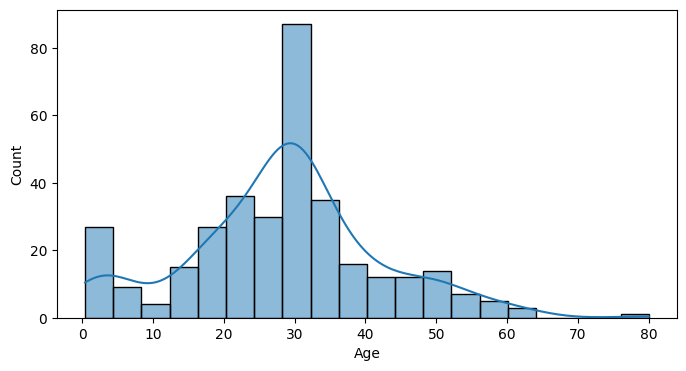

In [46]:
plt.figure(figsize=(8, 4))

# Histograma com seaborn
sns.histplot(var3, bins=20, stat="count", kde=True)


## Mostre um gráfico de barras de sobrevivência por sexo (masculino/feminino) e classe.

In [47]:
s_df = df[df.Survived == 1]

In [48]:
s_df.Sex.value_counts()

,count
Sex,
female,231
male,109


In [49]:
s_df.Pclass.value_counts()

,count
Pclass,
1,134
3,119
2,87


<Axes: xlabel='Pclass', ylabel='count'>

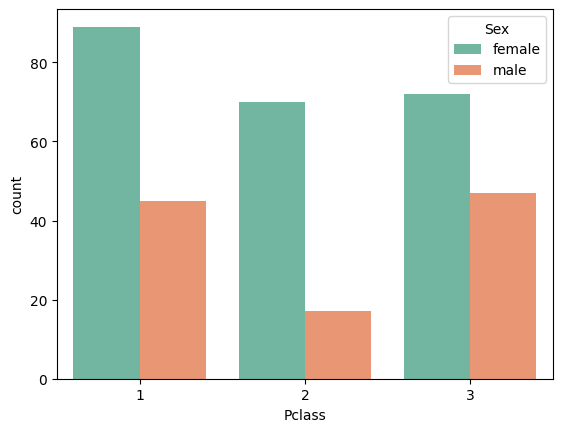

In [50]:
sns.countplot(x = "Pclass", hue = "Sex", data = s_df, palette = "Set2")

## Tamanho de família (FamilySize) vs taxa de sobrevivência

In [56]:
# Criar FamilySize (se ainda não existir)
if 'FamilySize' not in df.columns:
    df['FamilySize'] = df['SibSp'].fillna(0).astype(int) + df['Parch'].fillna(0).astype(int) + 1

# Agrupa por FamilySize e calcula contagem e taxa
fs = df.groupby('FamilySize')['Survived'].agg(['count','mean']).reset_index().rename(columns={'mean':'survival_rate','count':'n'})

# Mostrar tabela resumida
display(fs)


,FamilySize,n,survival_rate
0,1,535,0.300935
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


/tmp/ipython-input-55605955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fs, x='FamilySize', y='survival_rate', palette="Set2")


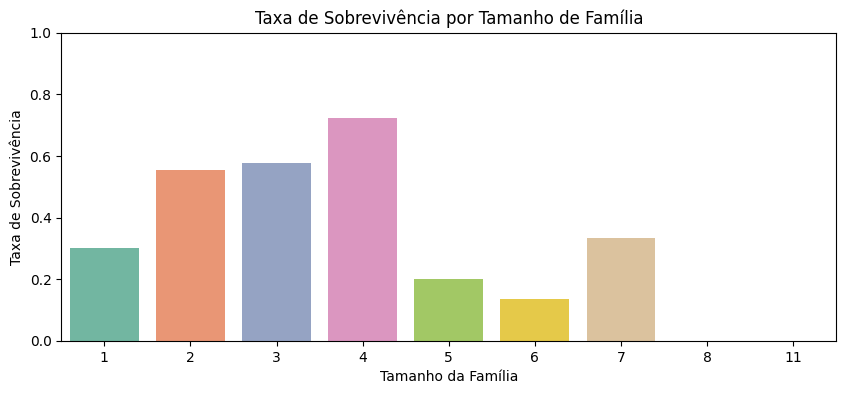

In [57]:
# Plot da taxa por tamanho de família
plt.figure(figsize=(10,4))
sns.barplot(data=fs, x='FamilySize', y='survival_rate', palette="Set2")
plt.ylim(0,1)
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Tamanho de Família')
plt.show()